In [215]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

# Useful plotting thingies:
%matplotlib inline
plt.style.use('ggplot')
%pylab.rcParams['figure.figsize'] = 16, 16



ERROR: Line magic function `%pylab.rcParams` not found.


In [216]:
import tables as tb
from sklearn.preprocessing import Normalizer, scale

# Set up the experimental matrices:
targets = ['ADAS11_bl', 'ADAS13_bl', 'MMSE_bl']
varnames = ['CT_VOL', 'L_HC_VOL', 'R_HC_VOL']
targets_regex = '|'.join(['^{}$'.format(t) for t in targets])
#modalities = ['CT', 'L_HC', 'R_HC']
modalities = ['CT']
l_segment_regex = '^L_HC_'
r_segment_regex = '^R_HC_'
modalities_regex = '|'.join(['^{}_'.format(m) for m in modalities])

matrices = []
l_D = []
r_D = []
for split in ['train', 'valid', 'test']:
    frame = pd.read_pickle('/projects/francisco/data/ADNI/cli_ct_seg_fused_{}.pkl'.format(split))
    ct = frame.filter(regex=modalities_regex).as_matrix()
    y_cur = frame.filter(regex=targets_regex).as_matrix()
    y_cur[np.isnan(y_cur)] = np.nanmean(y_cur)
    l_segs = frame.filter(regex=l_segment_regex).as_matrix()
    r_segs = frame.filter(regex=r_segment_regex).as_matrix()
    ct_vol = np.sum(ct, axis=1)
    l_hc_vol = np.sum(l_segs, axis=1)
    r_hc_vol = np.sum(r_segs, axis=1)
    matrices.append([y_cur, ct_vol, l_hc_vol, r_hc_vol])
    

In [217]:
from matplotlib import pyplot as plt

#frame = pd.read_pickle('/projects/francisco/data/ADNI/cli_ct_seg_fused_train.pkl'.format(split))
frame = pd.read_pickle('/projects/francisco/data/ADNI/master_fused.pkl'.format(split))
l_segs = frame.filter(regex=l_segment_regex).as_matrix()
r_segs = frame.filter(regex=r_segment_regex).as_matrix()
ct = frame.filter(regex=modalities_regex).as_matrix()
y_cur = frame.filter(regex=targets_regex).as_matrix()
y_cur[np.isnan(y_cur)] = np.nanmean(y_cur)
classes = frame['DX_bl'].as_matrix()
c = classes
c[c=='AD'] = 0
c[c=='CN'] = 1
c[c=='LMCI'] = 2

print classes

[1 1 0 1 2 2 0 0 2 0 0 2 1 2 1 1 2 1 1 0 2 2 0 2 2 2 2 1 2 1 1 0 0 2 1 1 0
 2 1 1 2 1 1 2 2 2 2 0 2 2 1 0 0 1 1 1 2 2 0 0 1 2 1 1 0 0 2 0 1 1 1 1 1 1
 0 2 0 2 2 2 2 2 2 2 1 0 0 0 0 2 2 1 2 1 2 2 1 2 2 2 1 0 2 1 2 0 2 0 2 1 2
 0 0 1 1 1 2 2 0 2 1 1 2 2 0 2 2 2 2 2 0 2 2 2 2 2 0 0 1 2 1 0 0 1 1 2 1 2
 2 2 2 2 0 2 2 0 1 0 1 0 2 0 2 1 1 0 2 2 2 2 2 2 2 2 1 2 1 1 1 0 0 2 2 2 2
 2 2 2 2 1 1 2 2 2 1 0 1 1 1 0 0 2 2 2 1 1 2 2 2 1 0 2 2 2 2 2 0 2 0 2 0 0
 2 1 0 1 1 1 2 2 2 0 2 0 2 2 2 2 2 0 2 0 2 1 2 2 2 0 1 0 2 2 0 1 1 2 2 0 0
 1 2 2 2 1 2 2 0 2 0 1 2 1 0 2 1 2 1 1 1 1 2 2 0 0 2 0 2 2 1 1 2 2 0 1 2 1
 2 1 2 2 0 1 2 2 2 0 1 2 2 2 1 1 2 1 1 2 2 2 2 2 0 2 2 1 1 2 2 2 2 2 2 1 1
 2 2 0 2 2 2 2 2 0 2 2 1 2 0 2 2 2 2 2 1 2 2 2 2 0 2 0 1 1 1 2 1 2 2 2 2 2
 0 0 0 0 0 1 0 2 2 2 1 0 2 2 1 1 0 2 2 0 2 1 2 1 2 2 2 2 0 0 0 0 0 1 1 2 2
 1 2 2 2 2 1 1 2 2 1 1 1 1 2 0 2 2 1 2 1 2 1 2 2 0 2 2 1 1 2 1 1 2 2 0 0 2
 1 1 2 2 2 0 2 2 0 2 1 1 2 2 2 0 1 2 2 1 1 0 0 1 2 2 2 2 0 2 1 1 1 1 0 2 2
 2 0 0 0 0 1 0 1 2 1 1 1 

In [218]:
import h5py as h5

fused_segmentations_path = '/projects/nikhil/miccai/input_data_comb/ad_mci_cn_{}.h5'



4421.93
4385.92
4453.17
230.80340564
241.097745321
236.610663732
(153,)


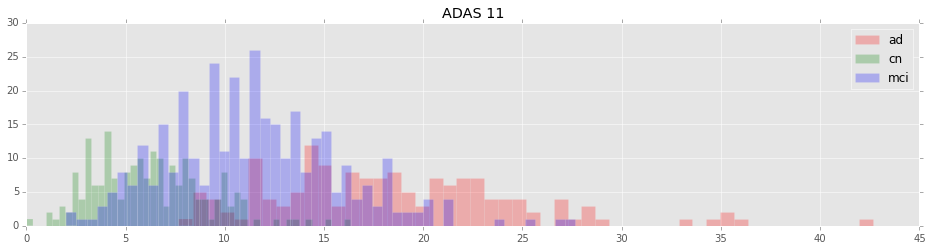

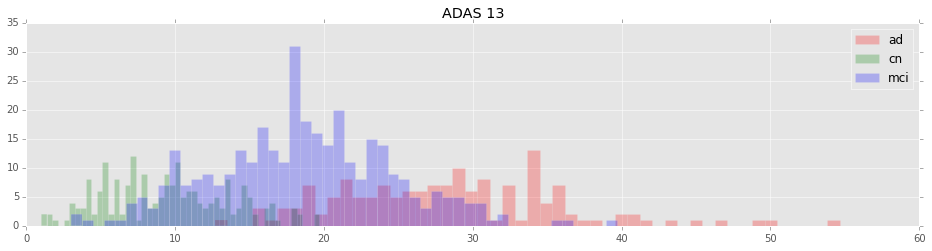

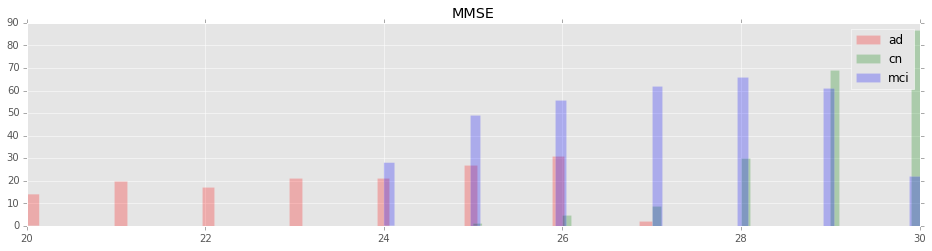

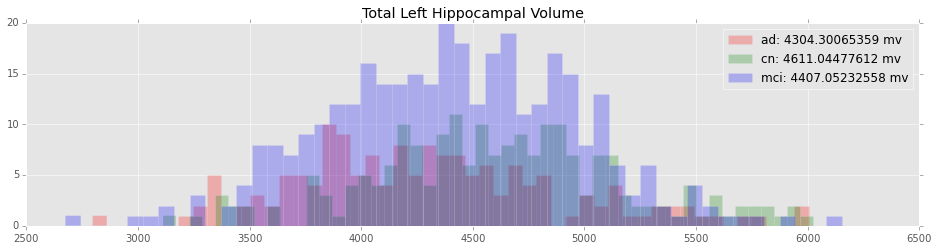

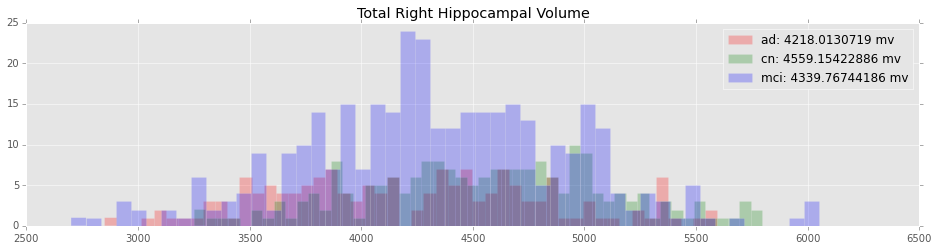

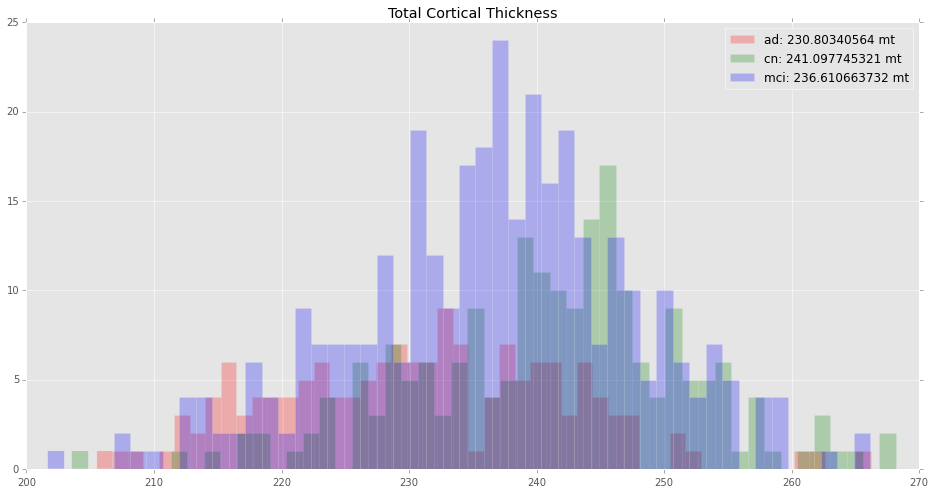

In [219]:
indad = np.where(classes==0)[0]
indcn = np.where(classes==1)[0]
indmci = np.where(classes==2)[0]

l_segs_ad = l_segs[indad]
r_segs_ad = r_segs[indad]

l_segs_cn = l_segs[indcn]
r_segs_cn = r_segs[indcn]

l_segs_mci = l_segs[indmci]
r_segs_mci = r_segs[indmci]

l_vols_ad = np.sum(l_segs_ad, axis=1)
l_vols_cn = np.sum(l_segs_cn, axis=1)
l_vols_mci = np.sum(l_segs_mci, axis=1)

r_vols_ad = np.sum(r_segs_ad, axis=1)
r_vols_cn = np.sum(r_segs_cn, axis=1)
r_vols_mci = np.sum(r_segs_mci, axis=1)

ct_ad = ct[indad]
ct_cn = ct[indcn]
ct_mci = ct[indmci]

adas11_ad = y_cur[indad,0]
adas11_cn = y_cur[indcn,0]
adas11_mci = y_cur[indmci,0]

adas13_ad = y_cur[indad,1]
adas13_cn = y_cur[indcn,1]
adas13_mci = y_cur[indmci,1]

mmse_ad = y_cur[indad,2]
mmse_cn = y_cur[indcn,2]
mmse_mci = y_cur[indmci,2]

total_ct_ad = np.sum(ct_ad, axis=1)
total_ct_cn = np.sum(ct_cn, axis=1)
total_ct_mci = np.sum(ct_mci, axis=1)

print np.mean(vols_ad)
print np.mean(vols_cn)
print np.mean(vols_mci)
print np.mean(total_ct_ad)
print np.mean(total_ct_cn)
print np.mean(total_ct_mci)
print adas11_ad.shape
pylab.rcParams['figure.figsize'] = 16, 8

plt.subplot(2,1,1)
plt.hist(adas11_ad, bins=50,color='r', alpha=0.25, label='ad')
plt.hist(adas11_cn, bins=50,color='g', alpha=0.25, label='cn')
plt.hist(adas11_mci, bins=50,color='b', alpha=0.25, label='mci')
plt.legend()
plt.title('ADAS 11')
plt.show()

plt.subplot(2,1,1)
plt.hist(adas13_ad, bins=50,color='r', alpha=0.25, label='ad')
plt.hist(adas13_cn, bins=50,color='g', alpha=0.25, label='cn')
plt.hist(adas13_mci, bins=50,color='b', alpha=0.25, label='mci')
plt.legend()
plt.title('ADAS 13')
plt.show()

plt.subplot(2,1,1)
plt.hist(mmse_ad, bins=50,color='r', alpha=0.25, label='ad')
plt.hist(mmse_cn, bins=50,color='g', alpha=0.25, label='cn')
plt.hist(mmse_mci, bins=50,color='b', alpha=0.25, label='mci')
plt.legend()
plt.title('MMSE')
plt.show()


plt.subplot(2,1,1)
plt.hist(l_vols_ad, bins=50, color='r', alpha=0.25, label='ad: {} mv'.format(np.mean(l_vols_ad)))
plt.hist(l_vols_cn, bins=50, color='g', alpha=0.25, label='cn: {} mv'.format(np.mean(l_vols_cn)))
plt.hist(l_vols_mci, bins=50, color='b', alpha=0.25, label='mci: {} mv'.format(np.mean(l_vols_mci)))
plt.legend()
plt.title('Total Left Hippocampal Volume')
plt.show()

plt.subplot(2,1,2)
plt.hist(r_vols_ad, bins=50,color='r', alpha=0.25, label='ad: {} mv'.format(np.mean(r_vols_ad)))
plt.hist(r_vols_cn, bins=50,color='g', alpha=0.25, label='cn: {} mv'.format(np.mean(r_vols_cn)))
plt.hist(r_vols_mci, bins=50,color='b', alpha=0.25, label='mci: {} mv'.format(np.mean(r_vols_mci)))
plt.legend()
plt.title('Total Right Hippocampal Volume')
plt.show()

plt.subplot(1,1,1)
plt.hist(total_ct_ad, bins=50,color='r', alpha=0.25, label='ad: {} mt'.format(np.mean(total_ct_ad)))
plt.hist(total_ct_cn, bins=50,color='g', alpha=0.25, label='cn: {} mt'.format(np.mean(total_ct_cn)))
plt.hist(total_ct_mci, bins=50,color='b', alpha=0.25, label='mci: {} mt'.format(np.mean(total_ct_mci)))
plt.legend()
plt.title('Total Cortical Thickness')
plt.show()
pylab.rcParams['figure.figsize'] = 16, 16


In [222]:
print stats.shape
print len(k_classifiers)
print k_classifiers
print X_v.shape

(3, 3, 1, 3)
0
[]
(98, 1)


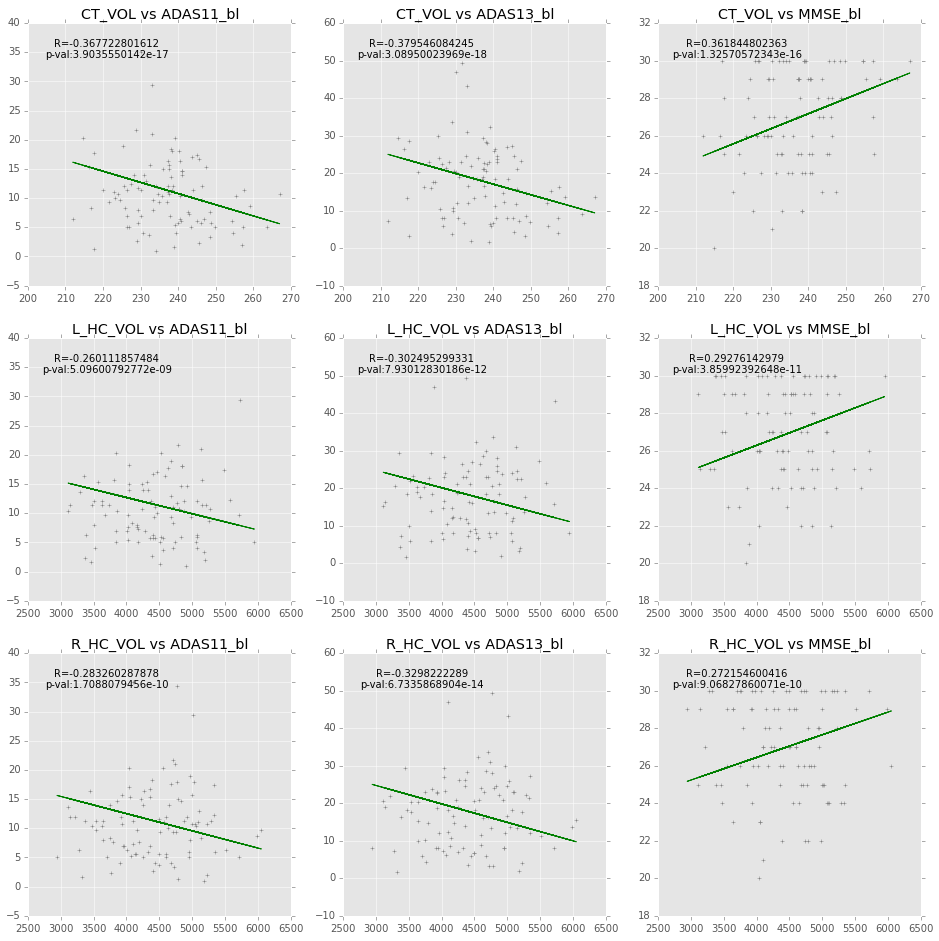

In [223]:
from tabulate import tabulate

f = 0
for v, vname in enumerate(varnames):
    X, y = matrices[0][v+1].reshape((-1,1)), matrices[0][0]
    X_v, y_v = matrices[1][v+1].reshape((-1,1)), matrices[1][0]
    for t, tname in enumerate(targets):
        f += 1  
        ax=plt.subplot(3,3,f)
        plt.title('{} vs {}'.format(vname, tname))
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X.ravel(),y[:,t])
        y_hat_v = intercept + slope * X_v
        
        # Plot outputs
        plt.scatter(X_v, y_v[:,t], marker='+', color='gray')
        plt.plot(X_v, y_hat_v, color='green', linewidth=1)
        plt.text(0.3, 0.9,'R={}\np-val:{}'.format(r_value, p_value), horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)

plt.grid()    
plt.show()



In [245]:
# Univariate regression on individual CT vars
frame = pd.read_pickle('/projects/francisco/data/ADNI/cli_ct_seg_fused_train.pkl')
frame = frame[np.isfinite(frame['ADAS11_bl']) & np.isfinite(frame['ADAS13_bl']) & np.isfinite(frame['MMSE_bl'])]
ct = frame.filter(regex=modalities_regex)
y_cur = frame.filter(regex=targets_regex).as_matrix()

scores = []
for i, var in enumerate(ct.keys()):
    cur_scores = [var]
    for t in range(3):
        x = ct[var].as_matrix()
        y = y_cur[:,t]
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x.ravel(), y)
        cur_scores.append(r_value ** 2)
        cur_scores.append(p_value)
    scores.append(tuple(cur_scores))


In [258]:
from IPython.display import display
from pandas import DataFrame

scores.sort(reverse=True, key=lambda s: abs(s[1] + s[3] + s[5]))
header = ['CT Var']
header2 = zip(['r**2 {}'.format(t) for t in targets], ['p-val {}'.format(t) for t in targets])
header = header + [val for pair in header2 for val in pair]
score_table = DataFrame(scores, columns=header)
print 'r2 **2 scores'
print display(score_table)

r2 **2 scores


,CT Var,r**2 ADAS11_bl,p-val ADAS11_bl,r**2 ADAS13_bl,p-val ADAS13_bl,r**2 MMSE_bl,p-val MMSE_bl
0,CT_TPOsup.R,0.172018,1.669747e-21,0.191387,5.341385e-24,0.190410,7.158478e-24
1,CT_TPOsup.L,0.170274,2.783587e-21,0.186553,2.268010e-23,0.147966,1.759861e-18
2,CT_MTG.L,0.152162,5.294251e-19,0.169942,3.067663e-21,0.116249,1.299178e-14
3,CT_STG.L,0.149873,1.020133e-18,0.162902,2.387232e-20,0.115076,1.796074e-14
4,CT_TPOmid.R,0.123893,1.559636e-15,0.144363,4.913237e-18,0.133208,1.151589e-16
5,CT_TPOmid.L,0.134819,7.318555e-17,0.147119,2.240903e-18,0.116698,1.147743e-14
6,CT_PCG.L,0.137332,3.603232e-17,0.138422,2.648369e-17,0.121157,3.336877e-15
7,CT_ITG.L,0.127642,5.479982e-16,0.137034,3.918994e-17,0.129303,3.444000e-16
8,CT_FFG.L,0.113356,2.886419e-14,0.130688,2.336120e-16,0.135040,6.875972e-17
9,CT_MTG.R,0.115200,1.735888e-14,0.136105,5.093392e-17,0.094778,4.609390e-12


None
